
We will use the fashion-MNIST dataset for this question (you can download it from any
other source also including libraries). Flatten and preprocess the data (if required) before starting
the tasks. It will become a 784-dimensional data with 10 classes, more details are available in the
link

# a) Train the k-means model on f-MNIST data with k = 10 and 10 random 784-dimensional points (in input range) as initializations. Report the number of points in each cluster.

In [3]:
# Install kagglehub package
%pip install kagglehub

import kagglehub # type: ignore
import os
import glob

# Downloading latest version of the dataset
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)
# Listing the files in the dataset
files = glob.glob(os.path.join(path, "*"))
print("Files in the dataset:")
for f in files:
    print(f)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/Users/ankmishr4/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/ankmishr4/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/ankmishr4/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4
Files in the dataset:
/Users/ankmishr4/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4/t10k-images-idx3-ubyte
/Users/ankmishr4/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4/fashion-mnist_test.csv
/Users/ankmishr4/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4/t10k-labels-idx1-ubyte
/Users/ankmishr4/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4/train-images-idx3-ubyte
/Users/ankmishr4/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4/fashion-mnist_train.csv
/Users/ankmishr4/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4/train-labels-idx1-ubyte


# Loading and Reading the Fashion - MNIST data

In [4]:
import os
import numpy as np

# loading the downloaded Fashion-MNIST files
train_images_path = os.path.join(path, 'train-images-idx3-ubyte')
train_labels_path = os.path.join(path, 'train-labels-idx1-ubyte')
test_images_path  = os.path.join(path, 't10k-images-idx3-ubyte')
test_labels_path  = os.path.join(path, 't10k-labels-idx1-ubyte')

def load_idxfile_images(filename):
    with open(filename, 'rb') as f:
        # Skip magic number and dimension info (16 bytes total)
        f.read(16)
        # Reading the rest, which are the image bytes
        data = np.frombuffer(f.read(), dtype=np.uint8)
    return data

def load_idxfile_labels(filename):
    with open(filename, 'rb') as f:
        # Skip magic number and dimension info (8 bytes total)
        f.read(8)
        # Reading the rest, which are the label bytes
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels

train_images_raw = load_idxfile_images(train_images_path)
train_labels = load_idxfile_labels(train_labels_path)
test_images_raw = load_idxfile_images(test_images_path)
test_labels = load_idxfile_labels(test_labels_path)


# Reshape the images into 28*28 

In [3]:
train_images_raw = train_images_raw.reshape(-1, 28, 28)
test_images_raw = test_images_raw.reshape(-1, 28, 28)


# Flattening and preprocessing the data

In [4]:
X_train = train_images_raw.reshape(-1, 784).astype(np.float32)
X_test = test_images_raw.reshape(-1, 784).astype(np.float32)

# Normalize to the [0, 1] range
X_train /= 255.0
X_test  /= 255.0

# Labels remain as they are
y_train = train_labels
y_test  = test_labels

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
# Should see (60000, 784) for X_train and (10000, 784) for X_test


Training data shape: (60000, 784)
Test data shape: (10000, 784)


#  Training a k-means model with 𝑘=10

In [5]:
from sklearn.cluster import KMeans

# Generate 10 random initialization points in the valid [0,1] pixel range
random_init_points = np.random.rand(10, 784).astype(np.float32)

# Creating the KMeans model
kmeans = KMeans(
    n_clusters=10,
    init=random_init_points,  # custom initialization
    n_init=1,                 # don't re-run with multiple inits
    max_iter=300,             # typical default
    random_state=42           # for reproducibility
)

# Fit on the training data
kmeans.fit(X_train)


KMeans(init=array([[0.5730904 , 0.01772207, 0.5372394 , ..., 0.9143217 , 0.4593407 ,
        0.3263019 ],
       [0.05063808, 0.5715192 , 0.9540645 , ..., 0.43818408, 0.98319054,
        0.90896726],
       [0.59543926, 0.15866031, 0.939232  , ..., 0.9166022 , 0.5704598 ,
        0.10202776],
       ...,
       [0.17737503, 0.66828066, 0.05507157, ..., 0.32733545, 0.31538668,
        0.40998265],
       [0.5056024 , 0.9696562 , 0.5689501 , ..., 0.9905847 , 0.57179177,
        0.57970834],
       [0.36239165, 0.66611433, 0.03697323, ..., 0.9892533 , 0.15591475,
        0.94956666]], dtype=float32),
       n_clusters=10, n_init=1, random_state=42)

# Reporting the number of points in each cluster

In [6]:
import numpy as np

labels = kmeans.labels_
counts = np.bincount(labels)

for i in range(10):
    print(f"Cluster {i}: {counts[i]} points")


Cluster 0: 2365 points
Cluster 1: 6367 points
Cluster 2: 5227 points
Cluster 3: 7643 points
Cluster 4: 7262 points
Cluster 5: 9491 points
Cluster 6: 8056 points
Cluster 7: 5837 points
Cluster 8: 2542 points
Cluster 9: 5210 points


# b) Visualize the cluster centers of each cluster as 2D images of all clusters.

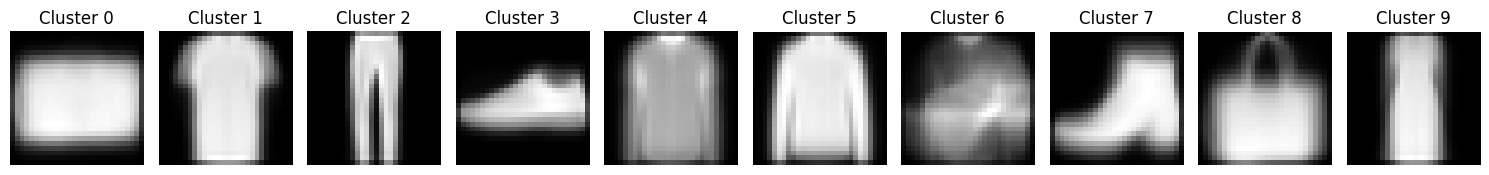

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Retrieving the cluster centers from the model
cluster_centers = kmeans.cluster_centers_

# Setting up the plot: 1 row, 10 columns
fig, axes = plt.subplots(1, 10, figsize=(15, 4))

# Plot each cluster center
for i, ax in enumerate(axes):
    # Reshaping the cluster center (784,) to a 28x28 image
    center_image = cluster_centers[i].reshape(28, 28)
    
    # Displaying the image using a grayscale color map
    ax.imshow(center_image, cmap='gray')
    
    # Set the title as the cluster number
    ax.set_title(f"Cluster {i}")
    
    # Hiding the axis for better clarity
    ax.axis('off')

plt.tight_layout()
plt.show()


# c) Visualize 10 images corresponding to each cluster

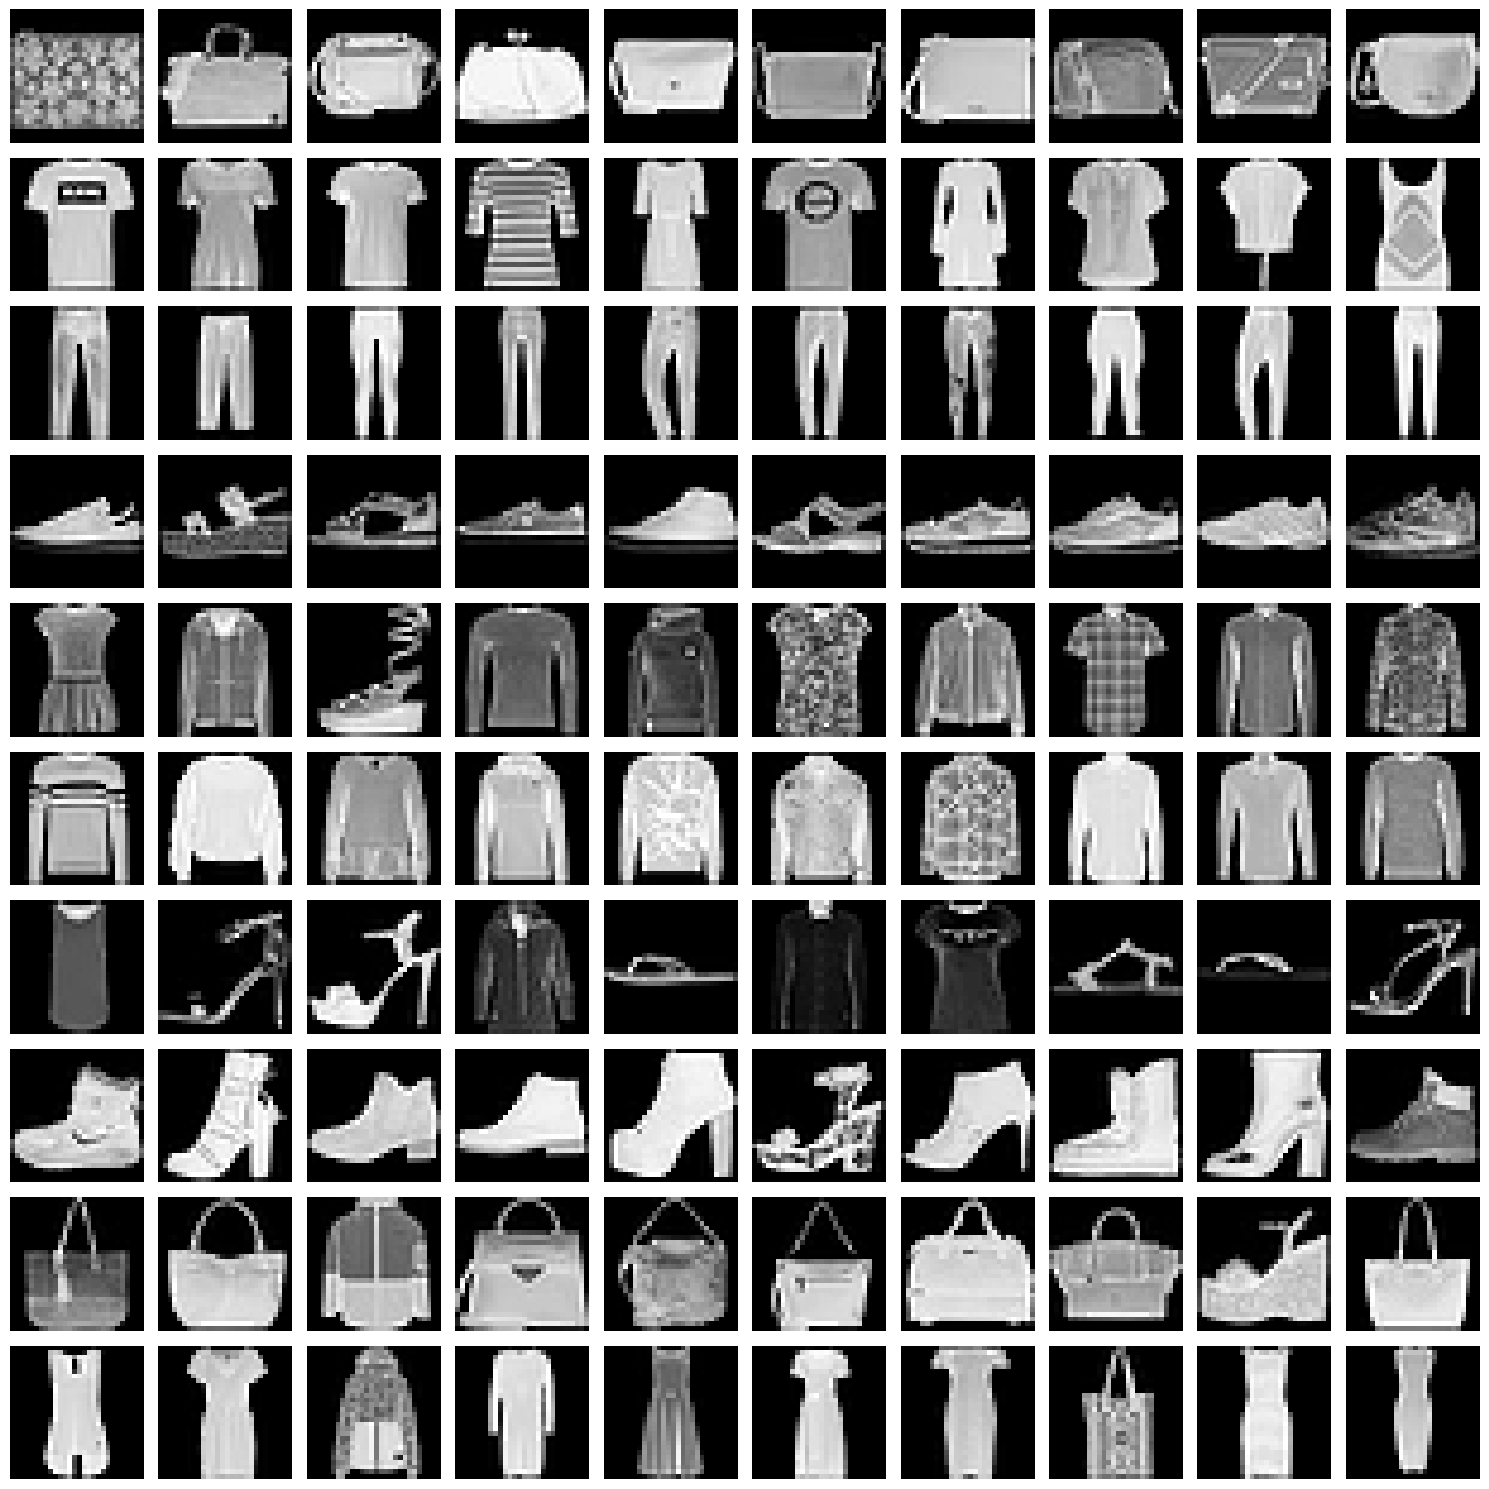

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Number of clusters and images per cluster to display
no_of_clusters = 10
no_of_images_per_cluster = 10

# Retrieving the cluster labels from the fitted k-means model
cluster_labels = kmeans.labels_

# Creating a figure with subplots:
# Each row corresponds to one cluster
fig, axes = plt.subplots(no_of_clusters, no_of_images_per_cluster, figsize=(15, 15))

# Looping over each cluster
for cluster in range(no_of_clusters):
    # Finding indices of images belonging to the current cluster
    cluster_indices = np.where(cluster_labels == cluster)[0]
    
    # Selecting 10 images from the current cluster.
    # Here we simply take the first 10 images found. 
    selected_indices = cluster_indices[:no_of_images_per_cluster]
    
    for i, idx in enumerate(selected_indices):
        # Extracting the image from X_train and reshape it to 28x28
        img = X_train[idx].reshape(28, 28)
        
        # Plotting the image in the corresponding subplot
        ax = axes[cluster, i]
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        
        # labelling the first image of each row with the cluster number
        if i == 0:
            ax.set_ylabel(f"Cluster {cluster}", fontsize=12)

plt.tight_layout()
plt.show()


# d) Train another k-means model with 10 images from each class as initializations , report the number of points in each cluster, and visualize the cluster centers.


Number of points in each cluster:
Cluster 0: 3777 points
Cluster 1: 7464 points
Cluster 2: 4284 points
Cluster 3: 5140 points
Cluster 4: 6188 points
Cluster 5: 7726 points
Cluster 6: 8218 points
Cluster 7: 7647 points
Cluster 8: 3747 points
Cluster 9: 5809 points


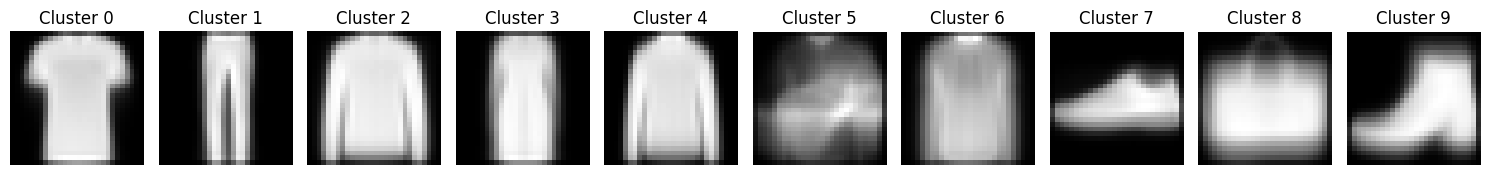

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming X_train is of shape (60000, 784) and y_train holds labels 0-9

# Step 1: Computing the initial centers as the average of 10 random images from each class.
init_centers = []
for label in range(10):
    # Finding indices of the current class
    indices = np.where(y_train == label)[0]
    
    # Randomly taking 10 images from the current class
    sampled_indices = np.random.choice(indices, size=10, replace=False)
    
    # Computing the mean over the selected samples to get the initial center
    avg_image = np.mean(X_train[sampled_indices], axis=0)
    init_centers.append(avg_image)

# Converting list to NumPy array of shape (10, 784)
init_centers = np.array(init_centers)

# Step 2: Training the k-means model with these informed initial centers
kmeans2 = KMeans(
    n_clusters=10,
    init=init_centers,  # using our computed centers as initialization
    n_init=1,           # force k-means to use the given initialization only
    max_iter=300,
    random_state=42     # for reproducibility
)
kmeans2.fit(X_train)

# Step 3: Reporting the number of points in each cluster
cluster_labels = kmeans2.labels_
cluster_counts = np.bincount(cluster_labels)
print("Number of points in each cluster:")
for i, count in enumerate(cluster_counts):
    print(f"Cluster {i}: {count} points")

# Step 4: Visualizing the cluster centers
cluster_centers = kmeans2.cluster_centers_

fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i, ax in enumerate(axes):
    center_image = cluster_centers[i].reshape(28, 28)
    
    # Displaying the image with a grayscale colormap
    ax.imshow(center_image, cmap='gray')
    ax.set_title(f"Cluster {i}")
    ax.axis('off')

plt.tight_layout()
plt.show()


# e) Visualize 10 images corresponding to each cluster.

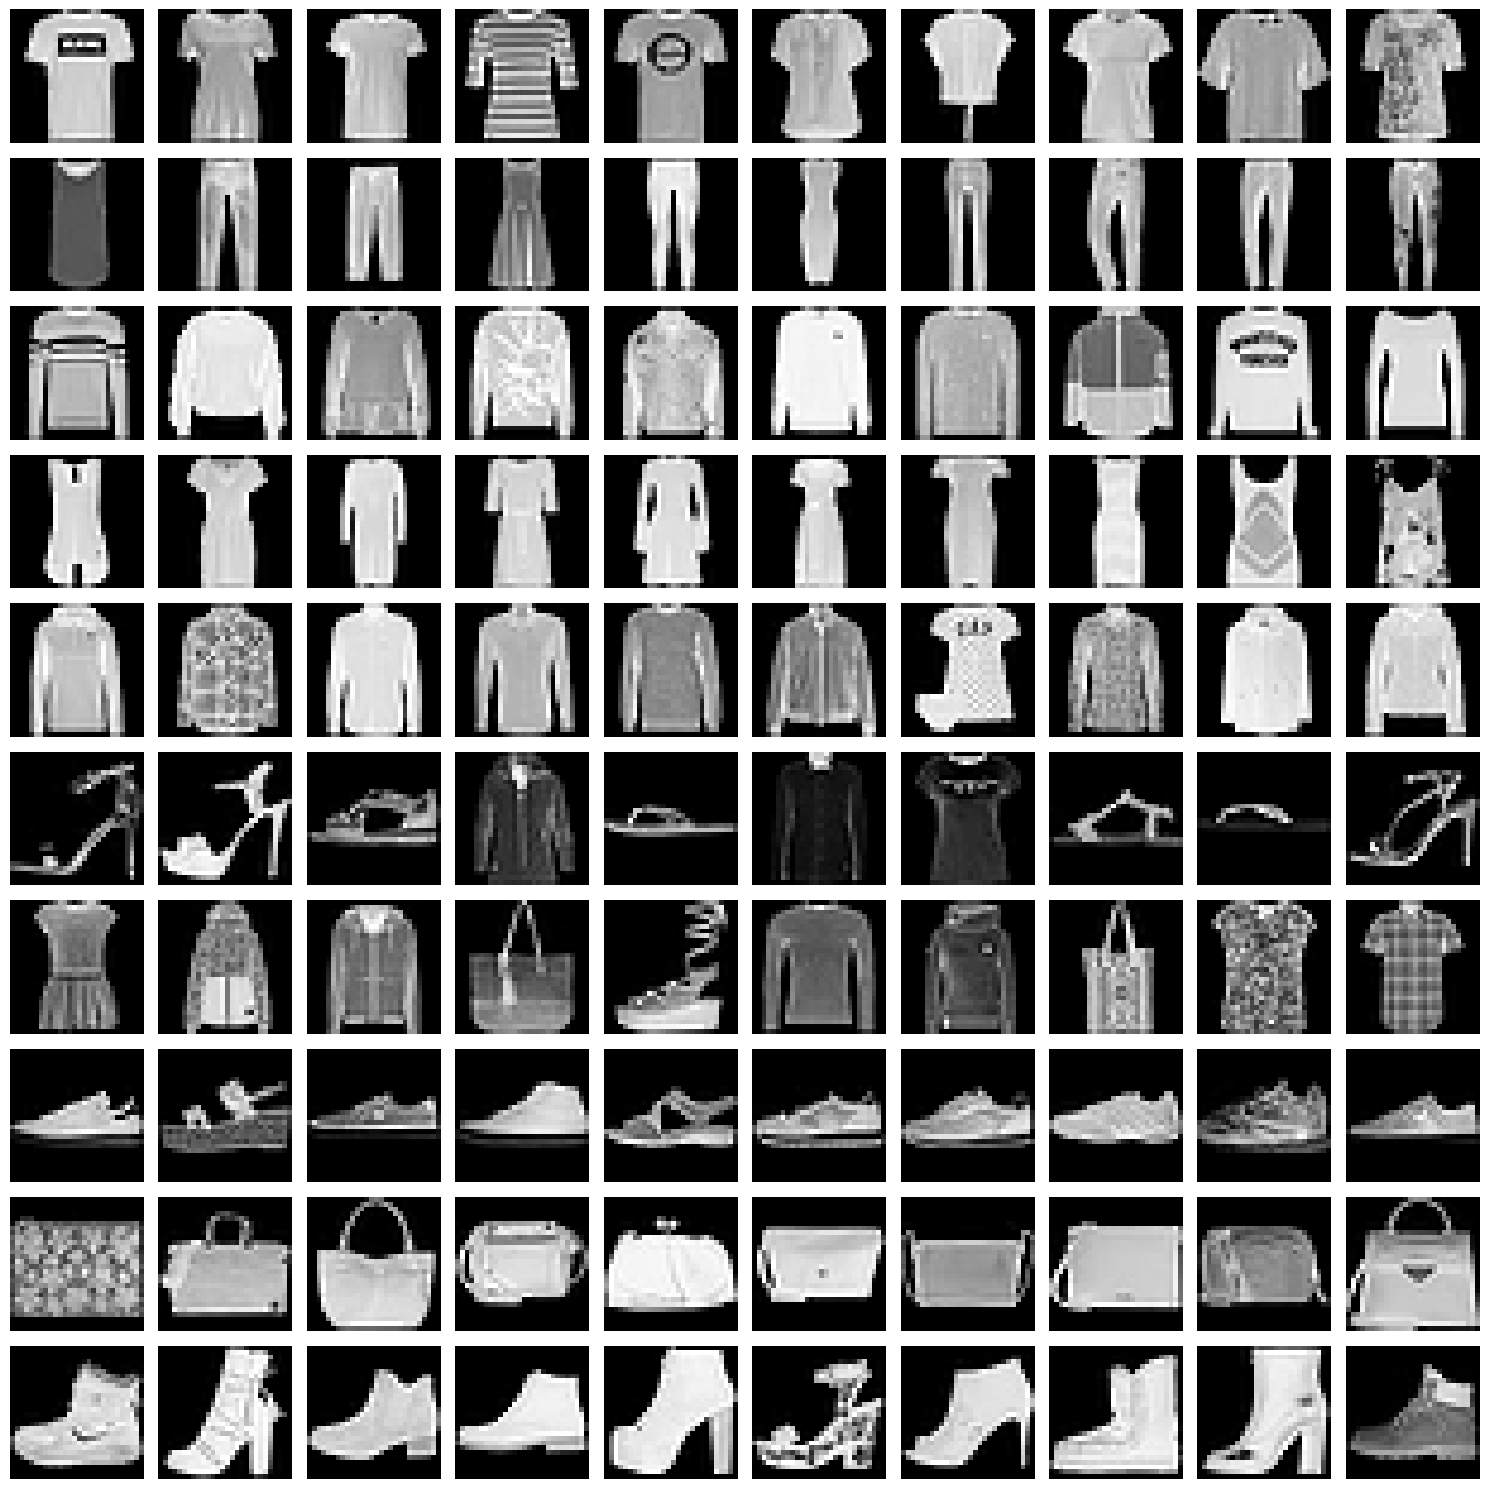

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Number of clusters and images per cluster to display
no_of_clusters = 10
no_of_images_per_cluster = 10

# Retrieving the cluster labels from the fitted k-means model
cluster_labels = kmeans2.labels_

# Creating a figure with subplots:
# Each row corresponds to one cluster
fig, axes = plt.subplots(no_of_clusters, no_of_images_per_cluster, figsize=(15, 15))

# Looping over each cluster
for cluster in range(no_of_clusters):
    # Finding indices of images belonging to the current cluster
    cluster_indices = np.where(cluster_labels == cluster)[0]
    
    # Selecting 10 images from the current cluster.
    # Here we simply take the first 10 images found. 
    selected_indices = cluster_indices[:no_of_images_per_cluster]
    
    for i, idx in enumerate(selected_indices):
        # Extracting the image from X_train and reshape it to 28x28
        img = X_train[idx].reshape(28, 28)
        
        # Plotting the image in the corresponding subplot
        ax = axes[cluster, i]
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        
        # labelling the first image of each row with the cluster number
        if i == 0:
            ax.set_ylabel(f"Cluster {cluster}", fontsize=12)

plt.tight_layout()
plt.show()


# f) Evaluate Clusters of part a and part d with Sum of Squared Error (SSE) method. Report the scores and comment on which case is a better clustering.

SSE for kmeans (random initialization): 1919626.75
SSE for kmeans2 (informed initialization): 1931926.75


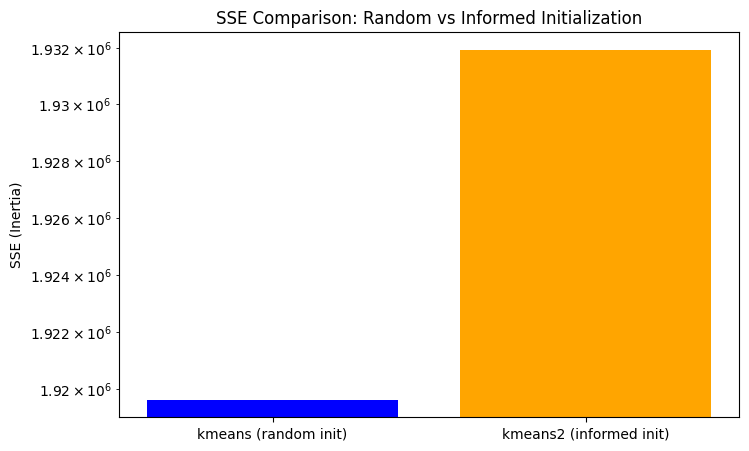

In [11]:
# kmeans: model with random 10 initialization points
# kmeans2: model with informed initialization (average of 10 images per class)

import matplotlib.pyplot as plt

# Retrieve the SSE (inertia) for each model:
sse_kmeans = kmeans.inertia_
sse_kmeans2 = kmeans2.inertia_

print("SSE for kmeans (random initialization):", sse_kmeans)
print("SSE for kmeans2 (informed initialization):", sse_kmeans2)


# Plotting the SSE values for comparison
# SSE values for both models
sse_values = [sse_kmeans, sse_kmeans2]
# Model names for the x-axis
model_names = ['kmeans (random init)', 'kmeans2 (informed init)']
# Creating a bar plot
plt.figure(figsize=(8, 5))
plt.bar(model_names, sse_values, color=['blue', 'orange'])
plt.ylabel('SSE (Inertia)')
plt.title('SSE Comparison: Random vs Informed Initialization')
plt.yscale('log')  # Log scale for better visibility
plt.grid(axis='y')
plt.show()
